# DNA Methylation P Values

In [1]:
import pandas as pd
from scipy.stats import ttest_ind_from_stats
import math
from IPython.display import display, HTML

In [2]:
#https://www.graphpad.com/quickcalcs/ttest2/

In [3]:
data_path = "data/P_Value_Calcuate/"
result_path = "Result/P_Value_Calcuate/"

In [4]:
df = pd.read_csv(data_path + "P_value_calculation_from_mean_and_SD.csv")

In [5]:
columns1 = ['one','Average1','SD1']
columns2 = ['two','Average2','SD2']
columns3 = ['three','Average3','SD3']
columns4 = ['four','Average4','SD4']
columns5 = ['five','Average5','SD5']
columns6 = ['six','Average6','SD6']
columns7 = ['seven','Average7','SD7']
columns8 = ['eight','Average8','SD8']

In [55]:
def get_p_values(Experiment,cnames):
    n = 3
    p_values=['p-values','NA']
    for i in range(2,5):
        m1 = float(Experiment[cnames[1]][1])
        std1 = float(Experiment[cnames[2]][1])
        m2 = float(Experiment[cnames[1]][i])
        std2 = float(Experiment[cnames[2]][i])
        #print("Air : ", "Mean : ", m1 , "SD : " , std1, "N : ", n )
        #print(Experiment[cnames[0]][i], "Mean : ", m2 , "SD : " , std2, "N : ", n  )
        tstat, pvalue = ttest_ind_from_stats(m1, std1, n, m2, std2, n)
        #print("P-Value : ", pvalue)
        p_values.append(round(pvalue,4))
        #print('*'*20)
    Experiment['p_vales']= p_values
    return Experiment.copy()


def get_experiment(data,cnames,result_path,filename):
    HeatMapPvalues = {}
    for i in range(0, len(data), 5):
        Experiment = data.loc[i:i+4,cnames].copy().reset_index(drop = True)
        #print("Data : ")
        #display(Experiment)
        #print("*"*20)
        Result = get_p_values(Experiment,cnames)
        geneName = Result[cnames[1]].iloc[0].split('-')[0]
        geneValues = list(Result["p_vales"])
        #print(geneName, geneValues[1:5])
        HeatMapPvalues[geneName] = geneValues[1:5]
    return HeatMapPvalues

In [56]:
H1 = get_experiment(df,columns1,result_path,"df-part-1")
H3 = get_experiment(df,columns3,result_path,"df-part-3")
H5 = get_experiment(df,columns5,result_path,"df-part-5")
H7 = get_experiment(df,columns7,result_path,"df-part-7")

In [57]:
dfH1 = pd.DataFrame(H1)
dfH3 = pd.DataFrame(H3)
dfH5 = pd.DataFrame(H5)
dfH7 = pd.DataFrame(H7)

In [58]:
dfH1

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0.9258,0.6718,0.5788,0.656,0.4608,0.6803,0.5118,0.7242,0.6728,0.6065,0.6869,0.8601,0.8559,0.5008
2,0.6909,0.6845,0.1357,0.136,0.8926,0.656,0.4481,0.6678,0.8244,0.5428,0.843,0.4942,0.2652,1
3,0.9123,0.018,0.0261,0.0972,0.1317,0.117,0.0702,0.0653,0.1077,0.0049,0.6098,0.5634,0.314,0.5589


In [59]:
dfH3

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0.083,0.0119,0.2376,0.062,0.0713,0.0364,0.3177,0.0408,0.0891,0.0965,0.4252,0.115,0.1467,0.8487
2,0.0004,0.4438,0.0009,0.034,0.5423,0.8989,0.17,0.3232,0.6603,0.2541,0.5365,0.0528,0.283,0.4874
3,0.0034,0.0092,0.0009,0.0068,0.4688,0.3401,0.0003,0.0166,0.0774,0.0392,0.0824,0.0079,0.1068,0.8194


In [60]:
dfH5

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0.0376,0.1022,0.0001,0.168,0.4289,0.3577,0.0404,0.0651,0.1714,0.1085,0.1647,0.0215,0.3004,0.7274
2,0.0002,0.0238,0.0002,0.0044,0.01,0.0267,0.0012,0.0133,0.053,0.0392,0.0355,0.0065,0,0.0709
3,0.0001,0.0034,0.0001,0.0099,0.0073,0.2305,0.0108,0.0006,0.0046,0.0015,0.0019,0.0019,0.0016,0.0355


In [61]:
dfH7

,AHRR,Alu,CY1P1A1,DNMT1,DNMT3a,DNMT3b,GPX3,HS LINE 5UTR,HSLINE 3 UTR,ORF1,ORF2,TET1,TET2,TET3
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,0.0019,0.2154,0.0003,0.7023,0.5551,0.451,0.7321,0.9259,0.569,0.2942,0.292,0.1289,0.8395,0.2677
2,0,0.2134,0,0.0257,0.0363,0.0196,0.0427,0.1757,0.077,0.5864,0.364,0.1393,0.0016,0.0282
3,0.0005,0.0034,0,0.0002,0.0325,0.0004,0.0004,0.0021,0.0145,0.0217,0.0103,0.0016,0.0001,0.0023


In [62]:
dfH1 = dfH1.drop([0]).copy()
dfH3 = dfH3.drop([0]).copy()
dfH5 = dfH5.drop([0]).copy()
dfH7 = dfH7.drop([0]).copy()

In [63]:
df1 = dfH1.transpose()
df3 = dfH3.transpose()
df5 = dfH5.transpose()
df7 = dfH7.transpose()

In [64]:
df1.columns = ['4L/min','1L/min','0.5L/min']
df3.columns = ['4L/min','1L/min','0.5L/min']
df5.columns = ['4L/min','1L/min','0.5L/min']
df7.columns = ['4L/min','1L/min','0.5L/min']

In [65]:
df1['4L/min'] = pd.to_numeric(df1['4L/min'])
df1['1L/min'] = pd.to_numeric(df1['1L/min'])
df1['0.5L/min'] = pd.to_numeric(df1['0.5L/min'])



df3['4L/min'] = pd.to_numeric(df3['4L/min'])
df3['1L/min'] = pd.to_numeric(df3['1L/min'])
df3['0.5L/min'] = pd.to_numeric(df3['0.5L/min'])



df5['4L/min'] = pd.to_numeric(df5['4L/min'])
df5['1L/min'] = pd.to_numeric(df5['1L/min'])
df5['0.5L/min'] = pd.to_numeric(df5['0.5L/min'])



df7['4L/min'] = pd.to_numeric(df7['4L/min'])
df7['1L/min'] = pd.to_numeric(df7['1L/min'])
df7['0.5L/min'] = pd.to_numeric(df7['0.5L/min'])

In [66]:
df1.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [67]:
df3.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [68]:
df5.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [69]:
df7.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [70]:
df1

,4L/min,1L/min,0.5L/min
AHRR,0.9258,0.6909,0.9123
ALU RT,0.6718,0.6845,0.0180
CYP1A1,0.5788,0.1357,0.0261
DNMT1,0.6560,0.1360,0.0972
DNMT3A,0.4608,0.8926,0.1317
DNMT3B,0.6803,0.6560,0.1170
GPX3,0.5118,0.4481,0.0702
HS 3 UTR,0.7242,0.6678,0.0653
HS 5 UTR,0.6728,0.8244,0.1077
ORF1,0.6065,0.5428,0.0049


In [71]:
df3

,4L/min,1L/min,0.5L/min
AHRR,0.0830,0.0004,0.0034
ALU RT,0.0119,0.4438,0.0092
CYP1A1,0.2376,0.0009,0.0009
DNMT1,0.0620,0.0340,0.0068
DNMT3A,0.0713,0.5423,0.4688
DNMT3B,0.0364,0.8989,0.3401
GPX3,0.3177,0.1700,0.0003
HS 3 UTR,0.0408,0.3232,0.0166
HS 5 UTR,0.0891,0.6603,0.0774
ORF1,0.0965,0.2541,0.0392


In [72]:
df5

,4L/min,1L/min,0.5L/min
AHRR,0.0376,0.0002,0.0001
ALU RT,0.1022,0.0238,0.0034
CYP1A1,0.0001,0.0002,0.0001
DNMT1,0.1680,0.0044,0.0099
DNMT3A,0.4289,0.0100,0.0073
DNMT3B,0.3577,0.0267,0.2305
GPX3,0.0404,0.0012,0.0108
HS 3 UTR,0.0651,0.0133,0.0006
HS 5 UTR,0.1714,0.0530,0.0046
ORF1,0.1085,0.0392,0.0015


In [73]:
df7

,4L/min,1L/min,0.5L/min
AHRR,0.0019,0.0000,0.0005
Alu,0.2154,0.2134,0.0034
CY1P1A1,0.0003,0.0000,0.0000
DNMT1,0.7023,0.0257,0.0002
DNMT3a,0.5551,0.0363,0.0325
DNMT3b,0.4510,0.0196,0.0004
GPX3,0.7321,0.0427,0.0004
HS LINE 5UTR,0.9259,0.1757,0.0021
HSLINE 3 UTR,0.5690,0.0770,0.0145
ORF1,0.2942,0.5864,0.0217


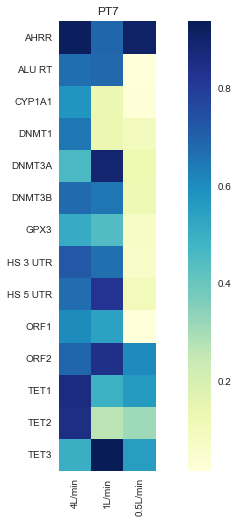

In [76]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df1,cmap="YlGnBu",square=True, robust = True).set_title("PT7")
fig.savefig("output.png")

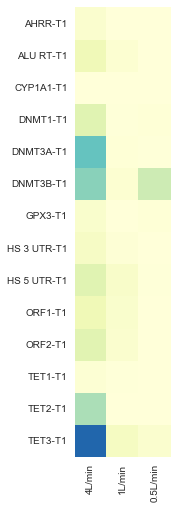

In [27]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df5,cmap="YlGnBu",square=True, vmin=0, vmax=1,cbar=False)

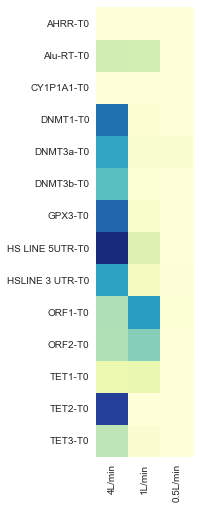

In [28]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df7,cmap="YlGnBu",square=True, vmin=0, vmax=1,cbar=False)